In [22]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [25]:
# city regions

regions = [
    'Aldoar',
    'Bonfim',
    'Campanha',
    'Centro',
    'Lordelo',
    'Paranhos',
    'Ramalde'
]

In [26]:
# read json files

region_data = {region: pd.read_json(f'logs/{region.lower()}.json') for region in regions}

In [33]:
def plot_region_history(region, data):
    """
    Plots the history of charger availability and queue size for a given region.
    
    Parameters:
    - region (str): The name of the region to be displayed as the title of the plot.
    - data (dict): A dictionary containing the charger availability and queue size data.
    """
    time_steps = np.linspace(0, 1440, len(data['chargers']), endpoint=False)
    hours = time_steps / 60

    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 

    axes[0].plot(hours, data['chargers'], marker='o', markersize=1, label='Available Chargers') 
    axes[0].set_title('Charger Availability')
    axes[0].set_xlabel('Time (Hours)')
    axes[0].set_ylabel('Chargers')
    axes[0].legend()

    axes[1].plot(hours, data['queue'], marker='s', markersize=1, label='Queue Size', color='orange') 
    axes[1].set_title('Charger Queues')
    axes[1].set_xlabel('Time (Hours)')
    axes[1].set_ylabel('Queue')
    axes[1].legend()

    for ax in axes:
        ax.set_xticks(range(0, 25, 3))
        ax.set_xticklabels([f'{int(hour)}:00' for hour in range(0, 25, 3)])

    fig.suptitle(region, fontsize=16)

    plt.tight_layout()  
    plt.show()

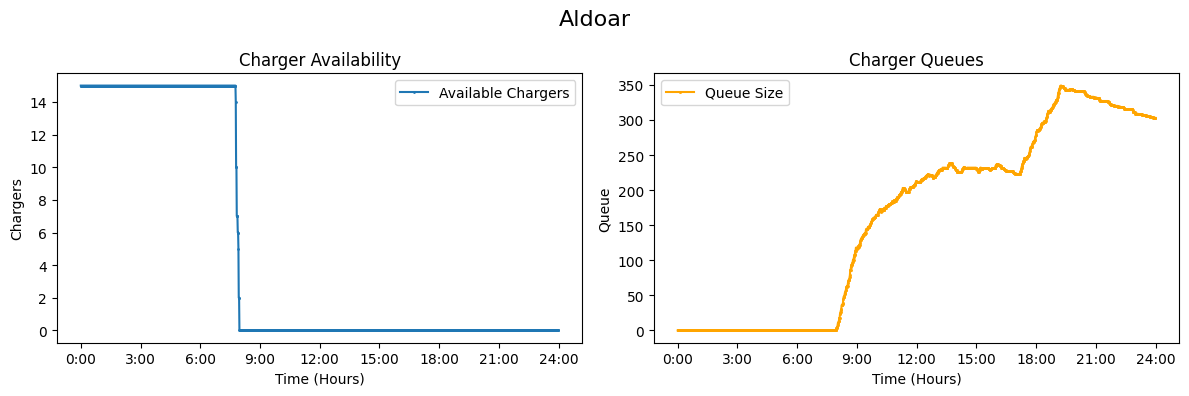

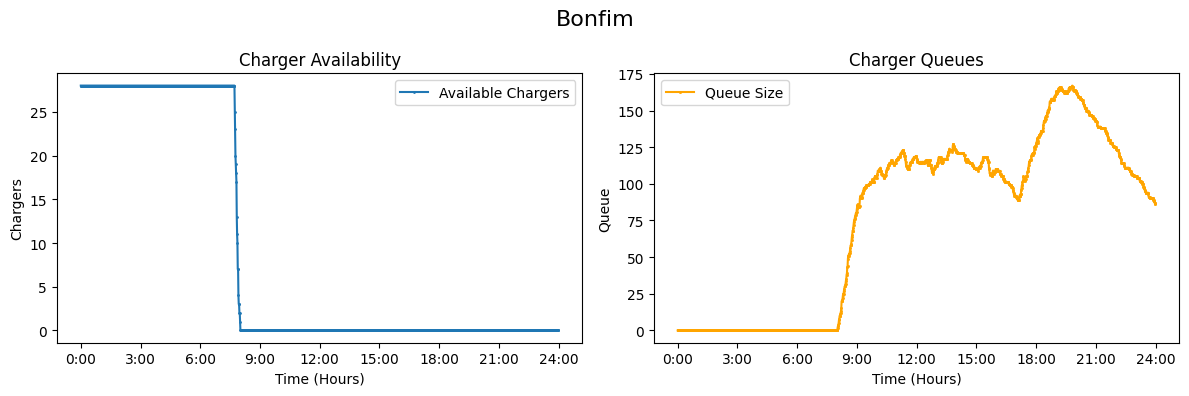

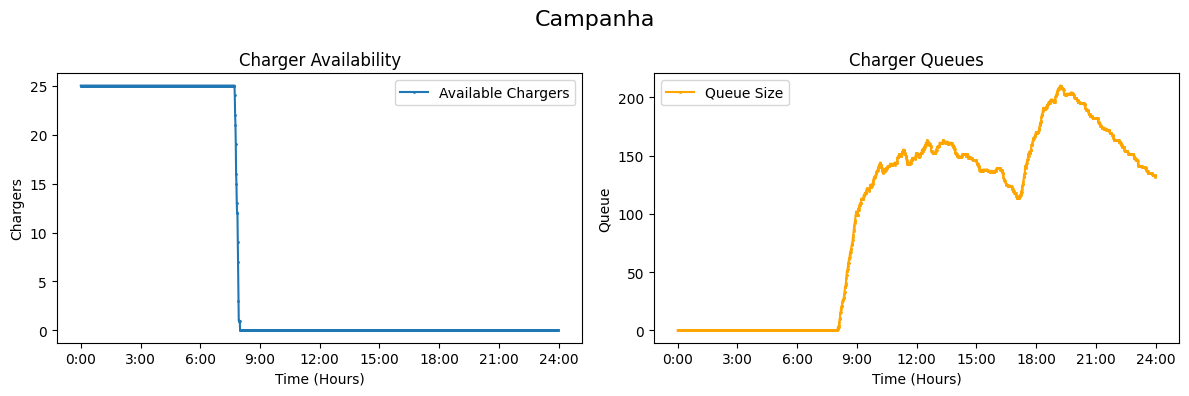

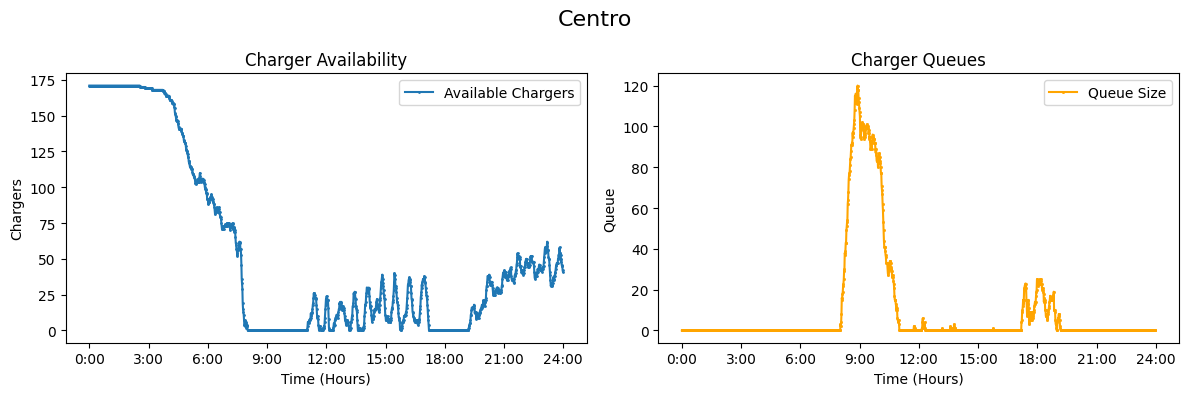

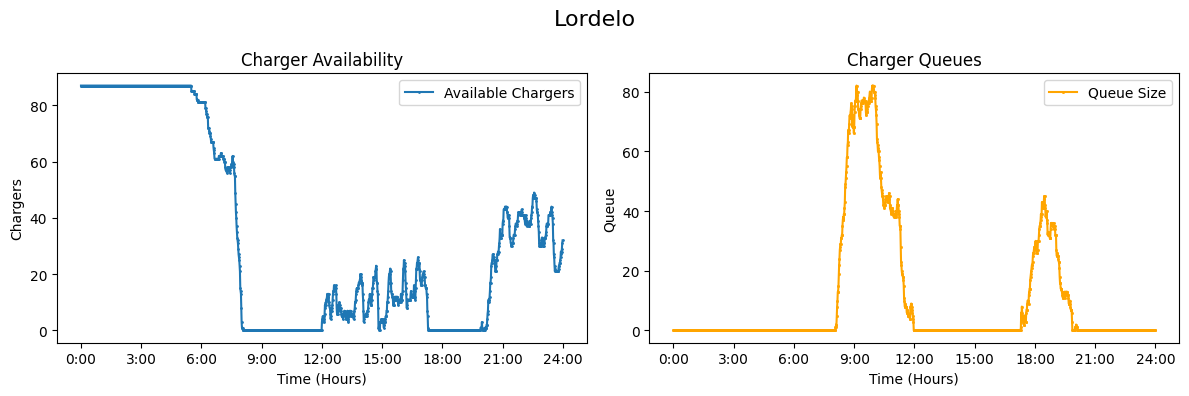

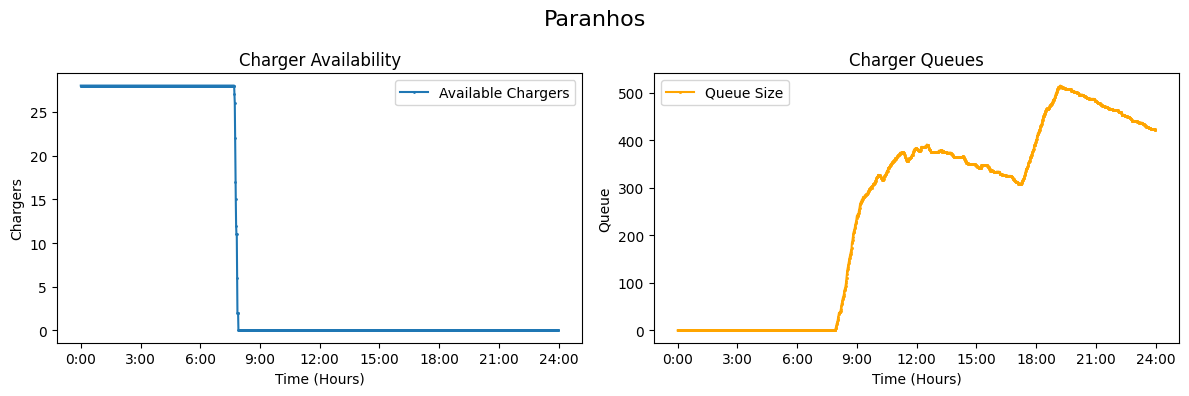

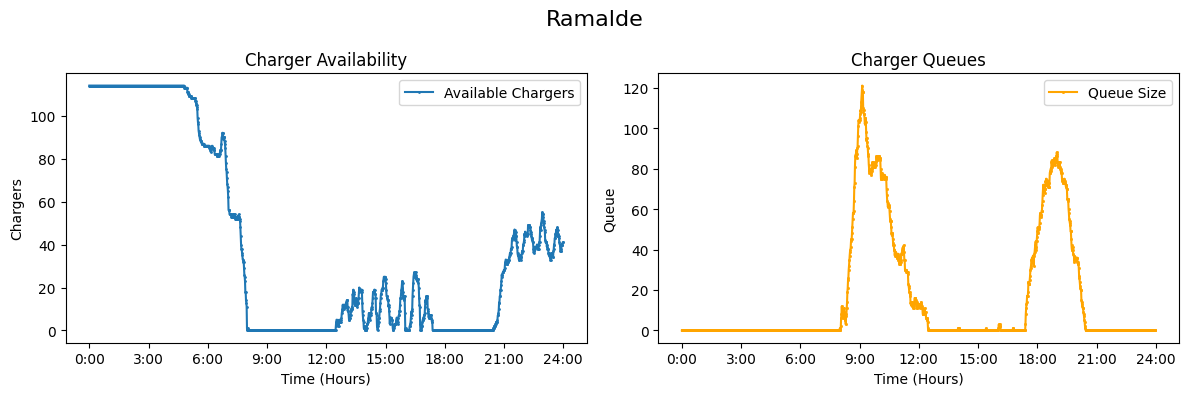

In [34]:
# plot the history of charger availability and queue size for each region

for region in regions:
    plot_region_history(region, region_data[region])